<a href="https://colab.research.google.com/github/setyanoegraha/college-computer-vision-2025/blob/main/jobsheet-03/jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 03: TEKNIK REGRESI GAMBAR

## Praktikum D1 - Regresi dari Citra Sintetis (Prediksi Radius Lingkaran)

### 1) Setup & Generator Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r= 5, max_r=20):
  r = np.random.randint(min_r, max_r +1) # radius acak
  img = np.zeros((img_size, img_size), dtype=np.uint8)
  cx = np.random.randint(r, img_size - r) # center-x
  cy = np.random.randint(r, img_size - r) # center-y
  cv2.circle(img, (cx, cy), r, 255, -1)   # lingkaran putih terisi
  img = (img / 255.0).astype(np.float32)
  # 3-channel biar kompatibel CNN
  img3 = np.stack([img, img, img], axis=-1)
  return img3, float(r), (cx, cy)

### 2) "Tebak Apa?" - Tampilkan Contoh Gambar TANPA Label

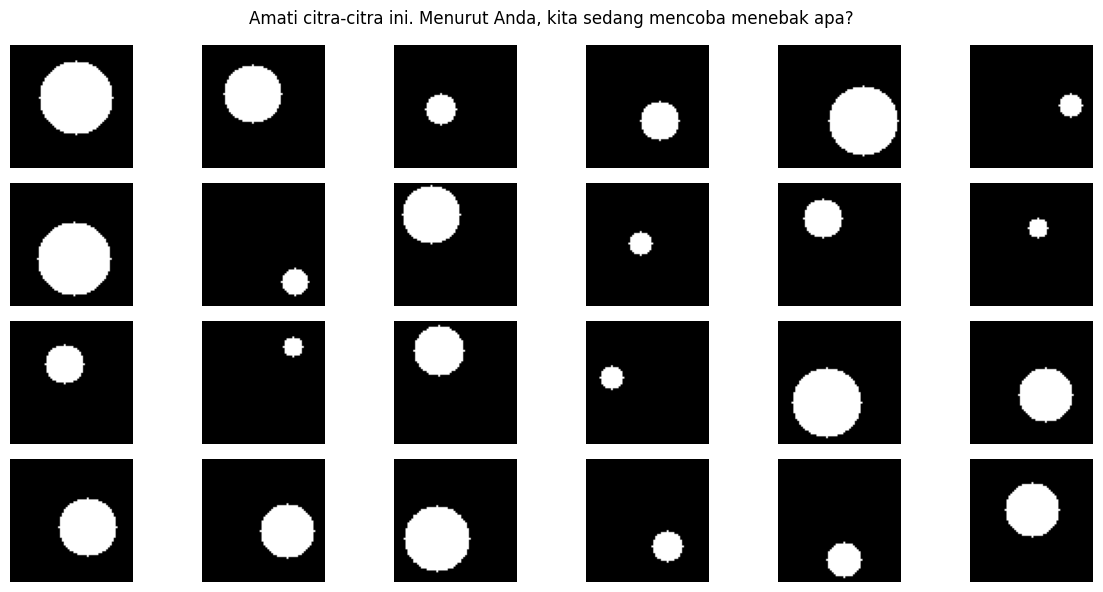

In [3]:
# Buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]
# Grid gambar tanpa label:
cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.axis('off')
plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?")
plt.tight_layout()
plt.show()

### 3) Buka Jawaban - Target yang Ingin Diprediksi

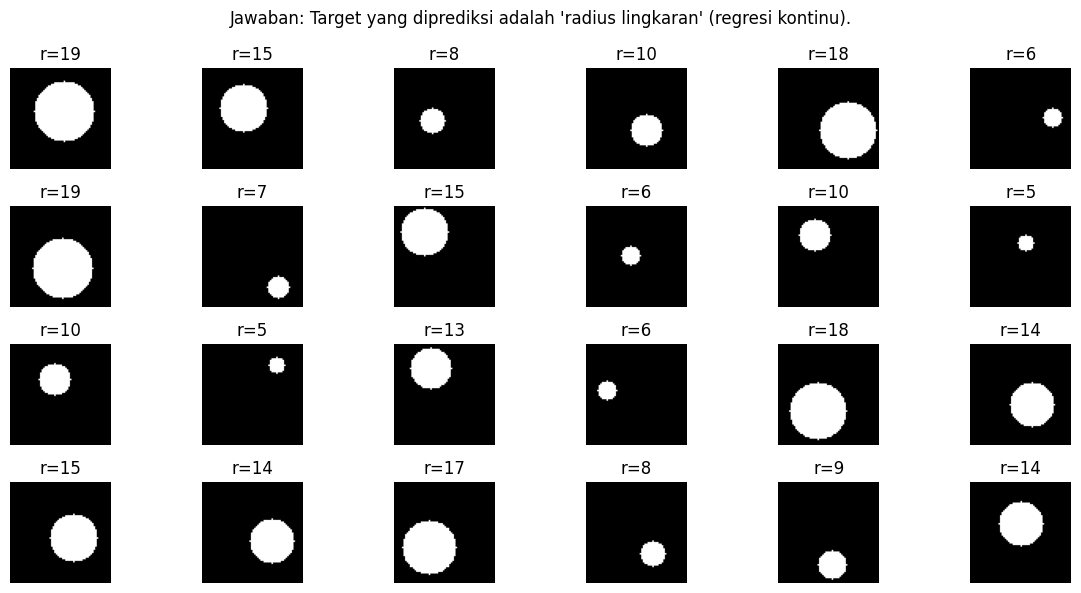

In [4]:
# Tampilkna kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.title(f"r={int(rads[i])}")
  plt.axis('off')
plt.suptitle("Jawaban: Target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).")
plt.tight_layout()
plt.show()

### 4) Latih CNN Kecil untuk Memprediksi Radius

In [5]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana
model = models.Sequential([
    layers.Input((64, 64, 3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'), layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # output regresi
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred) **2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} |  R²={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE=1.002 | RMSE=1.217 |  R²=0.930


**Plot history & True vs Predicted:**

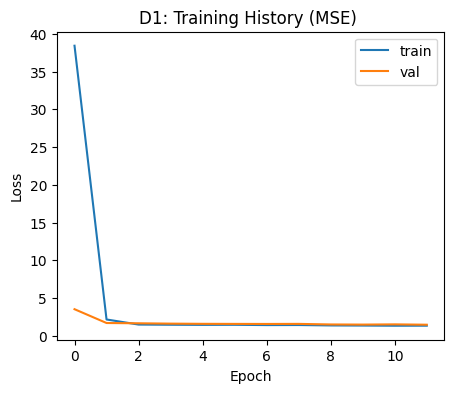

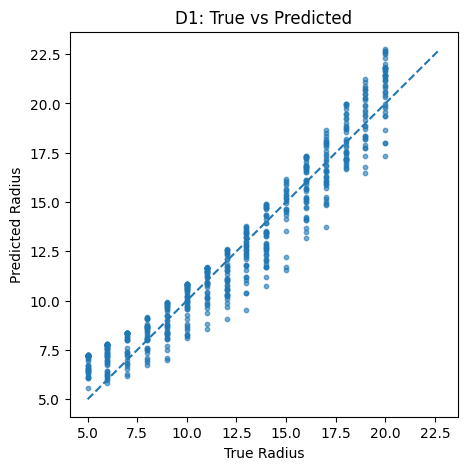

In [6]:
# Plot loss
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE) ")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Scatter True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius")
plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()

### 5) Tantangan Mini

=== [Eksperimen 1] Radius Lebih Lebar (8–28) ===
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


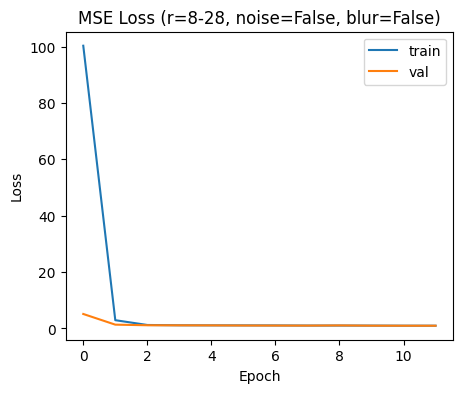

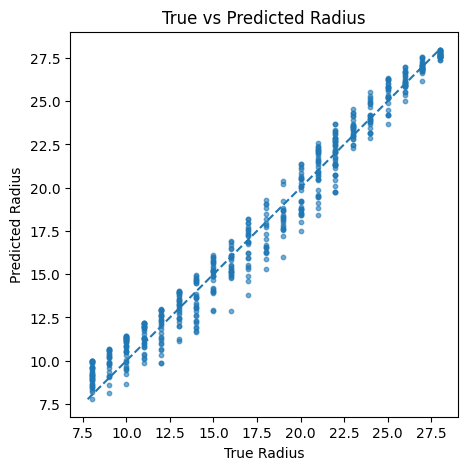

MAE = 0.787 | RMSE = 0.976 | R² = 0.975

=== [Eksperimen 2] Tambahkan Gaussian Noise ===
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


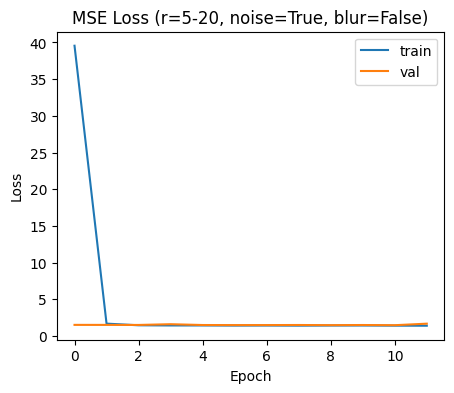

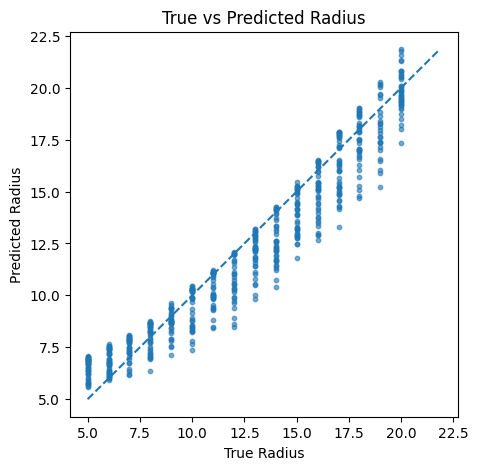

MAE = 1.022 | RMSE = 1.299 | R² = 0.922

=== [Eksperimen 2B] Tambahkan Gaussian Blur ===
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


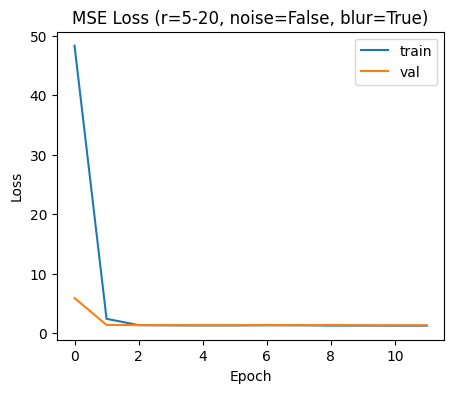

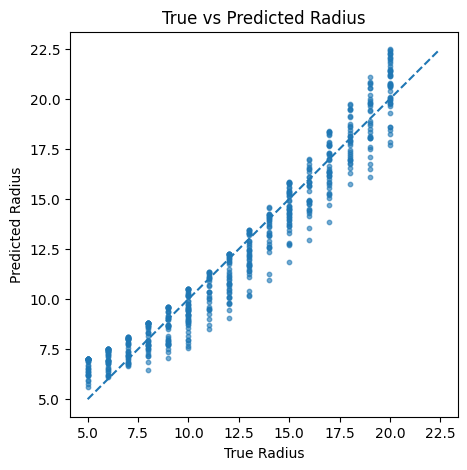

MAE = 0.927 | RMSE = 1.144 | R² = 0.939

=== [Eksperimen 3] Multi-Output Regression: [r, cx, cy] ===
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE → radius=0.94, cx=9.17, cy=9.48
RMSE → radius=1.11, cx=11.10, cy=11.32
R² → radius=0.942, cx=-0.002, cy=-0.025


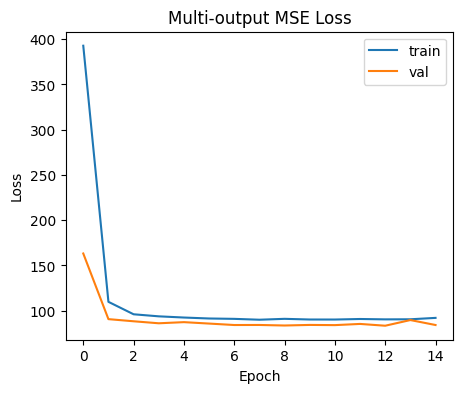

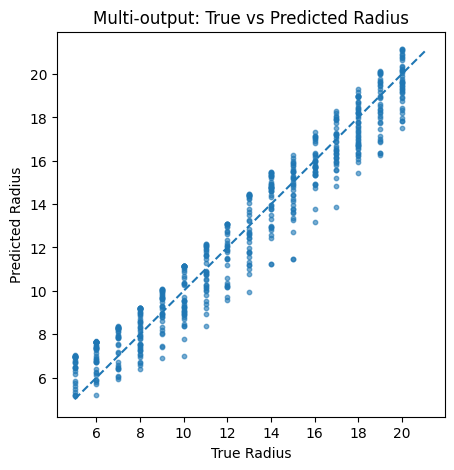

In [8]:
# ============================================================
# 📦 IMPORT LIBRARIES
# ============================================================
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models

# ============================================================
# 🧩 FUNCTION: DATA GENERATOR DASAR
# ============================================================
def make_sample(img_size=64, min_r=5, max_r=20, noise=False, blur=False):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, 255, -1)

    # Optional noise
    if noise:
        noise_img = np.random.normal(0, 25, img.shape)
        img = np.clip(img + noise_img, 0, 255)

    # Optional blur
    if blur:
        img = cv2.GaussianBlur(img, (5, 5), 1)

    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r), (cx, cy)

# ============================================================
# ⚙️ FUNCTION: TRAIN & EVALUATE CNN UNTUK REGRESI
# ============================================================
def train_and_evaluate(min_r=5, max_r=20, noise=False, blur=False):
    N = 3000
    X, y, _ = zip(*[make_sample(min_r=min_r, max_r=max_r, noise=noise, blur=blur) for _ in range(N)])
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

    model = models.Sequential([
        layers.Input((64, 64, 3)),
        layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'), layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

    y_pred = model.predict(Xte).ravel()
    mae = mean_absolute_error(yte, y_pred)
    rmse = float(np.sqrt(np.mean((yte - y_pred) ** 2)))
    r2 = r2_score(yte, y_pred)

    # Plot Loss
    plt.figure(figsize=(5, 4))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title(f"MSE Loss (r={min_r}-{max_r}, noise={noise}, blur={blur})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Plot Scatter
    plt.figure(figsize=(5, 5))
    plt.scatter(yte, y_pred, s=10, alpha=0.6)
    lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
    plt.plot(lims, lims, '--')
    plt.xlabel("True Radius")
    plt.ylabel("Predicted Radius")
    plt.title("True vs Predicted Radius")
    plt.show()

    print(f"MAE = {mae:.3f} | RMSE = {rmse:.3f} | R² = {r2:.3f}")
    return mae, rmse, r2

# ============================================================
# 🧠 EXPERIMENT 1: UBAH RENTANG RADIUS (8–28)
# ============================================================
print("=== [Eksperimen 1] Radius Lebih Lebar (8–28) ===")
mae1, rmse1, r21 = train_and_evaluate(min_r=8, max_r=28)

# ============================================================
# 🧠 EXPERIMENT 2: TAMBAH NOISE & BLUR
# ============================================================
print("\n=== [Eksperimen 2] Tambahkan Gaussian Noise ===")
mae2, rmse2, r22 = train_and_evaluate(noise=True)

print("\n=== [Eksperimen 2B] Tambahkan Gaussian Blur ===")
mae3, rmse3, r23 = train_and_evaluate(blur=True)

# ============================================================
# 🧠 EXPERIMENT 3: MULTI-OUTPUT REGRESSION [r, cx, cy]
# ============================================================
print("\n=== [Eksperimen 3] Multi-Output Regression: [r, cx, cy] ===")

# Dataset multi-output
N = 3000
X, y_tuple, _ = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
# Reshape y to be (N, 3) for multi-output
y = np.array(y_tuple, dtype=np.float32).reshape(-1, 1) # Reshape radius
# Get cx and cy and stack them with radius
_, _, C = zip(*[make_sample() for _ in range(N)])
C = np.array(C, dtype=np.float32)
y = np.hstack((y, C))


Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model multi-output
model = models.Sequential([
    layers.Input((64, 64, 3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'), layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)  # Output: [r, cx, cy]
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=15, batch_size=64, verbose=0)

y_pred = model.predict(Xte)
mae = np.mean(np.abs(y_pred - yte), axis=0)
rmse = np.sqrt(np.mean((y_pred - yte) ** 2, axis=0))
r2_r = r2_score(yte[:, 0], y_pred[:, 0])
r2_cx = r2_score(yte[:, 1], y_pred[:, 1])
r2_cy = r2_score(yte[:, 2], y_pred[:, 2])

print(f"MAE → radius={mae[0]:.2f}, cx={mae[1]:.2f}, cy={mae[2]:.2f}")
print(f"RMSE → radius={rmse[0]:.2f}, cx={rmse[1]:.2f}, cy={rmse[2]:.2f}")
print(f"R² → radius={r2_r:.3f}, cx={r2_cx:.3f}, cy={r2_cy:.3f}")

# Visualisasi per dimensi
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Multi-output MSE Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Scatter radius vs prediksi
plt.figure(figsize=(5, 5))
plt.scatter(yte[:, 0], y_pred[:, 0], s=10, alpha=0.6)
lims = [min(yte[:, 0].min(), y_pred[:, 0].min()), max(yte[:, 0].max(), y_pred[:, 0].max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius")
plt.ylabel("Predicted Radius")
plt.title("Multi-output: True vs Predicted Radius")
plt.show()

## Praktikum D2 - Menebak Umur Manusia dari Foto Wajah (UTKFace)

### Langkah 1 - Membuat Akun Kaggle dan Mengunduh kaggle.json

Ikuti langkah berikut:
1. Buka situs https://www.kaggle.com
2. Daftar menggunakan email Google atau GitHub.
3. Setelah login, klik profil di kanan atas → pilih “Account”.
4. Gulir ke bawah ke bagian API → klik “Create New API Token”.
5. File bernama kaggle.json akan otomatis terunduh ke komputer Anda.
File ini berisi API key pribadi agar Colab bisa mengakses dataset Kaggle Anda.

### Langkah 2 - Mengunggah kaggle.json ke Colab

In [18]:
# Jalankan ini di awal notebook
from google.colab import files
files.upload() # pilih file kaggle.json dari komputer Anda

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"pandus","key":"92012818bc97936885d110559415f12d"}'}

In [19]:
import os, shutil
if os.path.exists("kaggle.json"):
  os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
  shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
  os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
  !pip -q install kaggle
  print("✅ Kaggle API siap digunakan.")
else:
  print("kaggle.json belum ditemukan. Upload terlebih dahulu.")

✅ Kaggle API siap digunakan.


### Langkah 3 - Mengunduh Dataset UTKFace dari Kaggle

In [20]:
# Unduh dataset UTKFace (sekali saja)
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("✅ Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
✅ Dataset UTKFace berhasil diekstrak.


### Langkah 4 - Menampilkan Contoh Gambar Dataset

Total gambar ditemukan: 23708


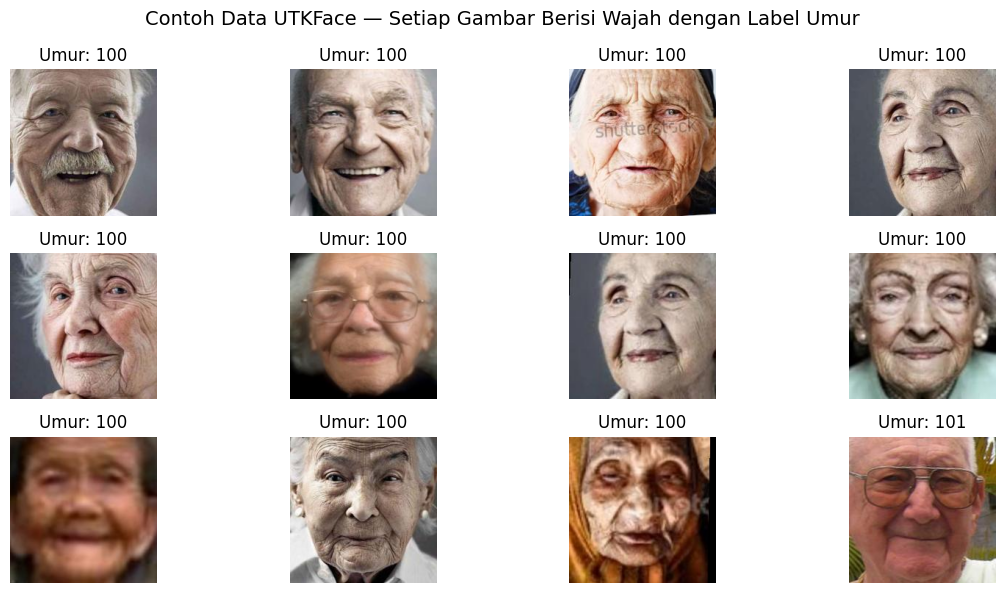

In [21]:
import matplotlib.pyplot as plt
import os, glob
from PIL import Image
# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")
plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
    # Ambil umur dari nama file
    age = int(os.path.basename(f).split("_")[0])
    img = Image.open(f)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Umur: {age}")
    plt.axis("off")
plt.suptitle("Contoh Data UTKFace — Setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

### Langkah 5 - Siapkan Dataset untuk Model

In [22]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

def parse_age_from_name(fp):
    return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(
    files, ages, test_size=0.2, random_state=42
)

IMG_SIZE = 160
def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label

train_ds = tf.data.Dataset.from_tensor_slices((train_files,
y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files,
y_test)).map(load_img).batch(64)

print("✅ Dataset siap dilatih.")

✅ Dataset siap dilatih.


### Langkah 6 - Membangun Model dengan Transfer Learning

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else
"CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False  # tahap awal: freeze backbone

# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x)  # output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='mse', metrics=['mae'])

model.summary()

Hardware: GPU
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Langkah 7 - Melatih Model (Tahap 1 - Frozen)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 38s 129ms/step - loss: 159.0669 - mae: 9.4350 - val_loss: 149.2166 - val_mae: 9.2449 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 147.6587 - mae: 8.9855 - val_loss: 140.6549 - val_mae: 8.8040 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 141.2217 - mae: 8.7303 - val_loss: 140.2130 - val_mae: 8.8376 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 138.4961 - mae: 8.6913 - val_loss: 138.8436 - val_mae: 8.7557 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 136.6788 - mae: 8.5553 - val_loss: 136.8728 - val_mae: 8.6995 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 133.4452 - mae: 8.4793 - val_loss: 137.0339 - val_mae: 8.7013 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 133.6886 - mae: 8.4489 - val_loss: 134.8892 - val

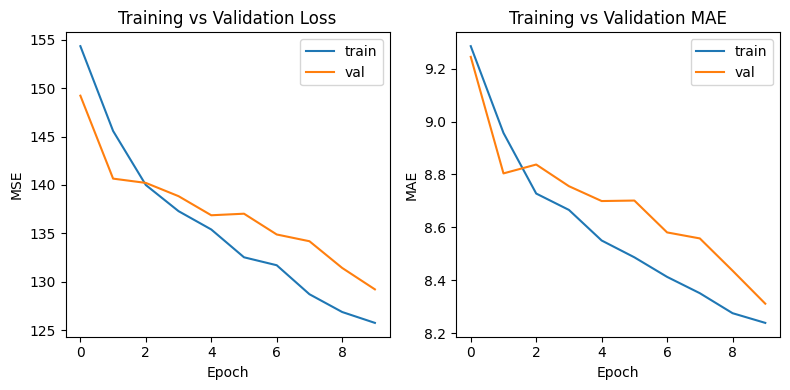

In [28]:
# Callback untuk pelatihan yang lebih stabil
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True,
                                     monitor='val_loss'),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-5,
                                         monitor='val_loss')
]

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

### Langkah 8 - Fine-tuning Backbone (Tahap 2)

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - loss: 194.2818 - mae: 10.2746 - val_loss: 141.3539 - val_mae: 9.1008 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 79.2339 - mae: 6.6502 - val_loss: 127.3989 - val_mae: 8.7623 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 52.8822 - mae: 5.4677 - val_loss: 116.3821 - val_mae: 8.1749 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 39.0739 - mae: 4.7554 - val_loss: 117.0813 - val_mae: 8.1635 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 30.6921 - mae: 4.2111 - val_loss: 103.4543 - val_mae: 7.4860 - learning_rate: 1.0000e-04


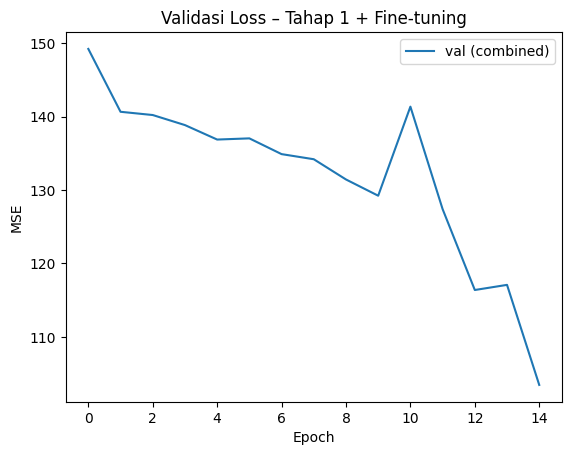

In [29]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False  # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='mse', metrics=['mae'])

history_ft = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
    callbacks=cb,
    verbose=1
)

# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'],
label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.show()

### Langkah 9 - Evaluasi Akhir (MAE, RMSE, R²)

MAE  = 7.49 tahun
RMSE = 10.17 tahun
R²   = 0.739


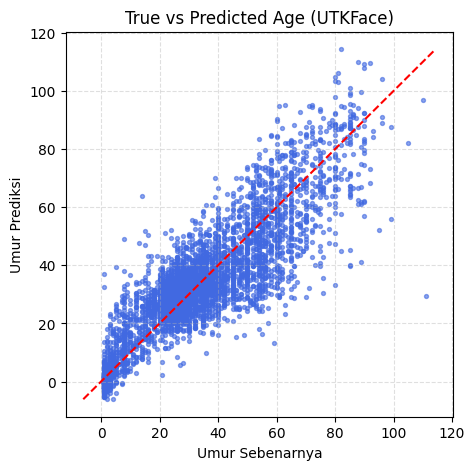

In [31]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae  = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2   = r2_score(y_test, y_pred)

print(f"MAE  = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R²   = {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

### Langkah 10 - Melihat Contoh Prediksi Nyata

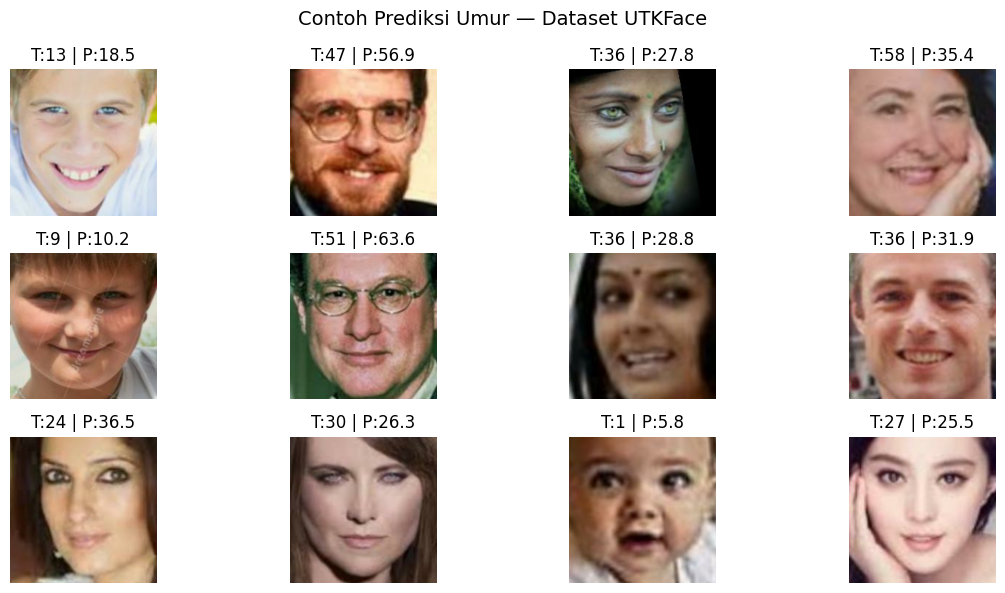

In [32]:
import random
sample_paths = random.sample(test_files, 12)

plt.figure(figsize=(12,6))
for i, path in enumerate(sample_paths):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))/255.0
  true_age = int(os.path.basename(path).split('_')[0])
  pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img.numpy())
  plt.title(f"T:{true_age} | P:{pred_age:.1f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Umur — Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()

### Tantangan Mini

1. Tambahkan data augmentation ekstra (kontras, brightness, zoom).
→ Bagaimana pengaruhnya pada MAE?
2. Ubah learning rate schedule atau optimizer.
→ Apakah model lebih stabil?
3. Pisahkan dataset per kelompok umur (0–10, 11–20, dst).
→ Mana kelompok dengan error terbesar?
4. Uji model Anda pada wajah sendiri (setelah resize).
→ Apakah prediksinya realistis?

Total gambar ditemukan: 23708

🧩 BAGIAN 1: DATA AUGMENTATION EKSTRA
Training dengan augmentasi data...
Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 162s 516ms/step - loss: 494.0289 - mae: 16.9199 - val_loss: 277.6837 - val_mae: 12.8269
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 477ms/step - loss: 397.1496 - mae: 15.2591 - val_loss: 245.8466 - val_mae: 12.2410
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 479ms/step - loss: 392.5125 - mae: 15.1941 - val_loss: 227.8326 - val_mae: 11.3016
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 477ms/step - loss: 390.7907 - mae: 15.1243 - val_loss: 213.2832 - val_mae: 11.0387
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 479ms/step - loss: 387.8495 - mae: 15.0846 - val_loss: 232.3212 - val_mae: 12.1562

📊 HASIL BAGIAN 1 — Data Augmentation
MAE  = 12.16 tahun
RMSE = 15.24 tahun
R²   = 0.415


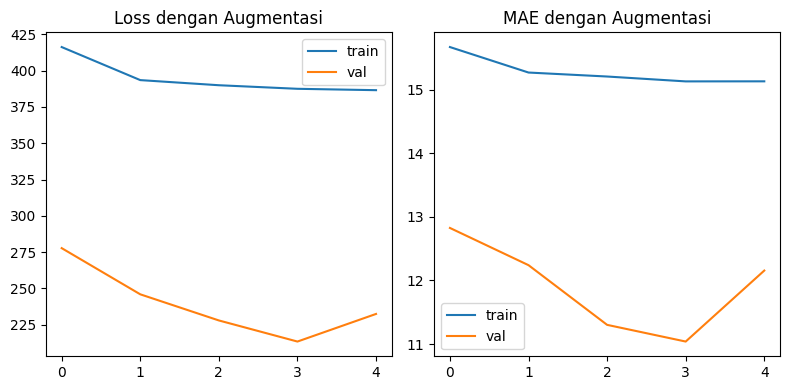


🧠 BAGIAN 2: OPTIMIZER DAN LEARNING RATE SCHEDULE
Training dengan scheduler learning rate...
Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 161s 514ms/step - loss: 386.9923 - mae: 15.0558 - val_loss: 215.0312 - val_mae: 11.4954
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 486ms/step - loss: 385.4285 - mae: 15.0531 - val_loss: 203.5829 - val_mae: 10.8659
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 484ms/step - loss: 383.8178 - mae: 15.0244 - val_loss: 224.4898 - val_mae: 12.0563
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 201s 480ms/step - loss: 384.6797 - mae: 15.0322 - val_loss: 224.3148 - val_mae: 11.9770
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 140s 472ms/step - loss: 383.7060 - mae: 15.0282 - val_loss: 225.3000 - val_mae: 11.9807

📊 HASIL BAGIAN 2 — Optimizer & LR Schedule
MAE  = 11.98 tahun
RMSE = 15.01 tahun
R²   = 0.432


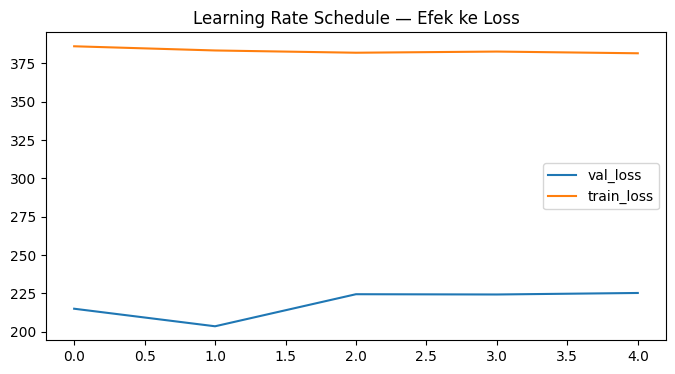


👶 BAGIAN 3: ANALISIS ERROR PER KELOMPOK UMUR


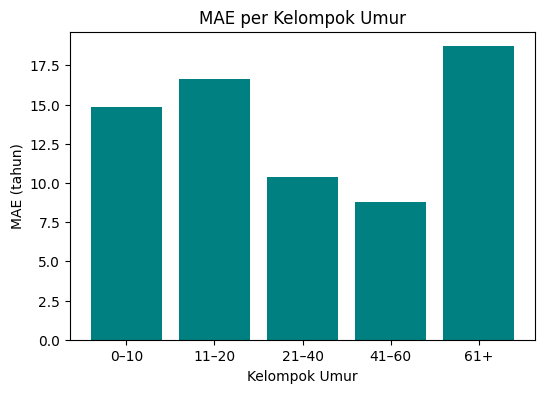


📊 HASIL BAGIAN 3 — Error per Kelompok Umur
0–10    : 14.86 tahun
11–20   : 16.61 tahun
21–40   : 10.37 tahun
41–60   : 8.81 tahun
61+     : 18.71 tahun
❗ Kelompok dengan error terbesar: 61+ (18.71 tahun)

🧍‍♂️ BAGIAN 4: UJI MODEL PADA FOTO WAJAH SENDIRI


Saving maself.jpg to maself.jpg


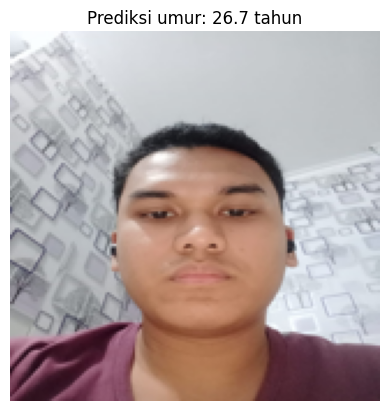

📷 File: maself.jpg → Prediksi umur: 26.7 tahun


In [37]:
# ============================================
# 📦 SETUP DASAR — IMPORT DAN DATA UTKFACE
# ============================================
import os, glob, random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt

# Ambil dataset UTKFace
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")

def parse_age_from_name(fp):
    return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(
    files, ages, test_size=0.2, random_state=42
)

IMG_SIZE = 160

def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label


# ====================================================
# 🧩 BAGIAN 1: DATA AUGMENTATION EKSTRA
# ====================================================
print("\n" + "="*60)
print("🧩 BAGIAN 1: DATA AUGMENTATION EKSTRA")
print("="*60)

from tensorflow.keras import layers

augment = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomZoom(0.2),
])

def load_img_aug(fp, label):
    img, label = load_img(fp, label)
    return augment(img), label

train_ds_aug = tf.data.Dataset.from_tensor_slices((train_files, y_train)).map(load_img_aug).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files, y_test)).map(load_img).batch(64)

base_model = tf.keras.applications.MobileNetV2(
    include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x)
model_aug = tf.keras.Model(inputs, outputs)

model_aug.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
print("Training dengan augmentasi data...")
hist_aug = model_aug.fit(train_ds_aug, validation_data=test_ds, epochs=5, verbose=1)

# --- Output evaluasi bagian 1 ---
y_pred = np.concatenate([model_aug.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)

print("\n📊 HASIL BAGIAN 1 — Data Augmentation")
print(f"MAE  = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R²   = {r2:.3f}")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist_aug.history['loss'], label='train')
plt.plot(hist_aug.history['val_loss'], label='val')
plt.title("Loss dengan Augmentasi")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_aug.history['mae'], label='train')
plt.plot(hist_aug.history['val_mae'], label='val')
plt.title("MAE dengan Augmentasi")
plt.legend()
plt.tight_layout()
plt.show()


# ====================================================
# 🧠 BAGIAN 2: OPTIMIZER / LEARNING RATE SCHEDULE
# ====================================================
print("\n" + "="*60)
print("🧠 BAGIAN 2: OPTIMIZER DAN LEARNING RATE SCHEDULE")
print("="*60)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=200, decay_rate=0.9
)

model_opt = tf.keras.models.clone_model(model_aug)
model_opt.set_weights(model_aug.get_weights())
model_opt.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss='mse', metrics=['mae'])

print("Training dengan scheduler learning rate...")
hist_opt = model_opt.fit(train_ds_aug, validation_data=test_ds, epochs=5, verbose=1)

# --- Output evaluasi bagian 2 ---
y_pred_opt = np.concatenate([model_opt.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae_opt = mean_absolute_error(y_test, y_pred_opt)
rmse_opt = sqrt(np.mean((y_test - y_pred_opt)**2))
r2_opt = r2_score(y_test, y_pred_opt)

print("\n📊 HASIL BAGIAN 2 — Optimizer & LR Schedule")
print(f"MAE  = {mae_opt:.2f} tahun")
print(f"RMSE = {rmse_opt:.2f} tahun")
print(f"R²   = {r2_opt:.3f}")

plt.figure(figsize=(8,4))
plt.plot(hist_opt.history['val_loss'], label='val_loss')
plt.plot(hist_opt.history['loss'], label='train_loss')
plt.title("Learning Rate Schedule — Efek ke Loss")
plt.legend()
plt.show()


# ====================================================
# 👶 BAGIAN 3: ANALISIS ERROR PER KELOMPOK UMUR
# ====================================================
print("\n" + "="*60)
print("👶 BAGIAN 3: ANALISIS ERROR PER KELOMPOK UMUR")
print("="*60)

groups = {
    "0–10": (0, 10),
    "11–20": (11, 20),
    "21–40": (21, 40),
    "41–60": (41, 60),
    "61+": (61, 116)
}

group_mae = {}
for name, (low, high) in groups.items():
    idx = (y_test >= low) & (y_test <= high)
    if np.sum(idx) > 0:
        group_mae[name] = mean_absolute_error(y_test[idx], y_pred_opt[idx])

plt.figure(figsize=(6,4))
plt.bar(group_mae.keys(), group_mae.values(), color='teal')
plt.title("MAE per Kelompok Umur")
plt.ylabel("MAE (tahun)")
plt.xlabel("Kelompok Umur")
plt.show()

max_group = max(group_mae, key=group_mae.get)
print("\n📊 HASIL BAGIAN 3 — Error per Kelompok Umur")
for k, v in group_mae.items():
    print(f"{k:8s}: {v:.2f} tahun")
print(f"❗ Kelompok dengan error terbesar: {max_group} ({group_mae[max_group]:.2f} tahun)")


# ====================================================
# 🧍‍♂️ BAGIAN 4: UJI MODEL PADA FOTO WAJAH SENDIRI
# ====================================================
print("\n" + "="*60)
print("🧍‍♂️ BAGIAN 4: UJI MODEL PADA FOTO WAJAH SENDIRI")
print("="*60)

from google.colab import files
uploaded = files.upload()

for fname in uploaded.keys():
    img_path = fname
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((IMG_SIZE, IMG_SIZE))
    img_arr = np.array(img_resized) / 255.0
    pred = model_opt.predict(tf.expand_dims(img_arr, 0), verbose=0).ravel()[0]

    plt.imshow(img_resized)
    plt.title(f"Prediksi umur: {pred:.1f} tahun")
    plt.axis("off")
    plt.show()

    print(f"📷 File: {fname} → Prediksi umur: {pred:.1f} tahun")


## Praktikum D3 - Menilai "Kepopuleran Hewan Peliharaan" dari Foto